<a href="https://colab.research.google.com/github/ibribr/DT8807/blob/master/SimpleRNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sequence-to-one (image into a label) similar to sentement analysis

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report
from keras.utils import plot_model

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(60000, 28, 28)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               20096     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 21,386
Trainable params: 21,386
Non-trainable params: 0
_________________________________________________________________


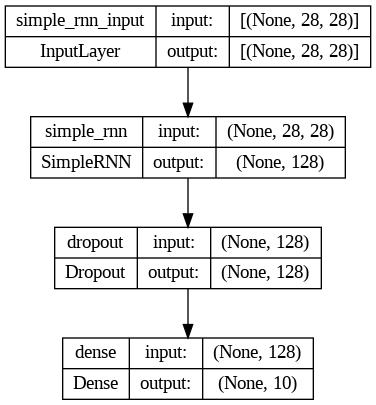

In [4]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)

# Normalize the input data
x_train = x_train / 255.0
X_test = x_test / 255.0

print(x_train.shape)

# One-hot encode the target labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model
model = Sequential()
model.add(SimpleRNN(units=128, input_shape=(28, 28), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()
plot_model(model, to_file = 'mnist_simpleRNN.jpg', show_shapes = True, show_layer_names = True)

In [5]:
# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_test, y_test), verbose=False)

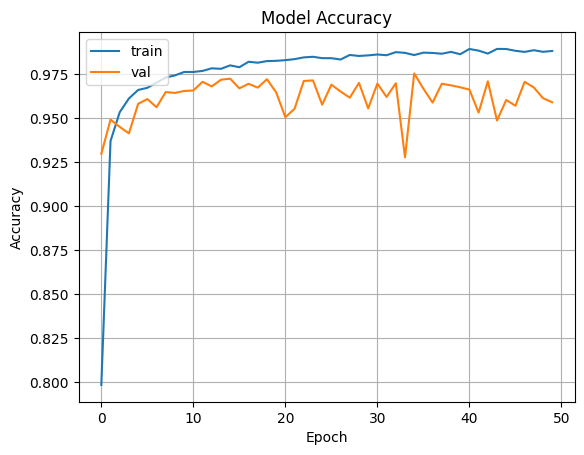

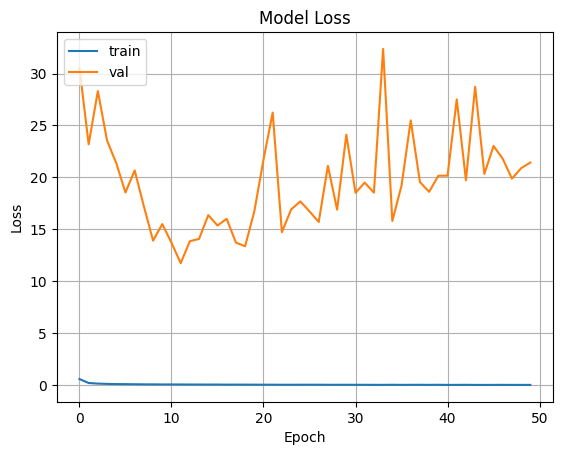

313/313 [==============================] - 3s 9ms/step - loss: 21.4354 - accuracy: 0.9589
Test loss: 21.435392379760742
Test accuracy: 0.958899974822998
313/313 [==============================] - 3s 8ms/step
(10000,)
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.96      0.97      1135
           2       0.96      0.98      0.97      1032
           3       0.88      0.99      0.93      1010
           4       0.97      0.96      0.96       982
           5       0.98      0.90      0.94       892
           6       0.99      0.98      0.98       958
           7       0.95      0.97      0.96      1028
           8       0.97      0.95      0.96       974
           9       0.97      0.90      0.93      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [6]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

y_pred = np.argmax(model.predict(x_test),axis=1)
y__test = np.argmax(y_test,axis=1)
print(y_pred.shape)

print('Classification report:\n', classification_report(y__test,y_pred))
print('Confusion matrx:\n', confusion_matrix(y__test, y_pred))
print('Accuracy: ', accuracy_score(y__test, y_pred))
print('Precision: ', precision_score(y__test, y_pred, average='micro'))
print('Recall: ', recall_score(y__test, y_pred, average='micro'))
print('f1_score: ', f1_score(y__test, y_pred, average='micro'))